In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
# 分类
from sklearn.neighbors import KNeighborsClassifier

In [2]:
one = plt.imread('./1-KNN/exercise/data/0/0_10.bmp')
one

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 193, 164,  42,   0,  27, 164, 243, 255, 255, 255, 255, 255,
        255, 255],
       [25

In [3]:
one.shape

(28, 28)

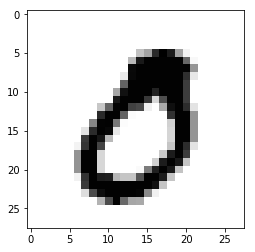

In [4]:
plt.imshow(one,cmap='gray')

In [5]:
# 用for循环来读取
X_train = []
for i in range(1,501):
    X_train.append(plt.imread('./1-KNN/exercise/data/0/0_%d.bmp' %(i)))

In [6]:
len(X_train)

500

In [7]:
X_train = []
x_test = []
Y_train = []
y_test = []
for i in range(10):
    for j in range(1,501):
        # 将数据保存到训练数据中
        if j < 451:
            # 读取所有文件的数据
            # 要变成1维的,分类需要是1维的
            X_train.append(plt.imread('./1-KNN/exercise/data/%d/%d_%d.bmp' %(i,i,j)).reshape(-1))
            # 数据所对应的值
            Y_train.append(i)
        # 将剩下的部分,保存到预测数据中
        else:
            # 读取所有文件的数据
            # 要变成1维的,分类需要是1维的
            x_test.append(plt.imread('./1-KNN/exercise/data/%d/%d_%d.bmp' %(i,i,j)).reshape(-1))
            # 数据所对应的值
            y_test.append(i)

In [12]:
import numpy as np

In [13]:
X_train,Y_train = np.array(X_train),np.array(Y_train)

x_test,y_test = np.array(x_test),np.array(y_test)

In [16]:
X_train.shape

(4500, 784)

In [26]:
# 随机找到一个数
n = np.random.randint(0,501,size=1)
n

array([38])

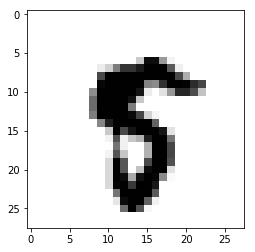

In [21]:
num = x_test[n].reshape((28,28))
plt.imshow(num,cmap='gray')

In [27]:
knn = KNeighborsClassifier()
# 训练数据
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [28]:
# 预测数据
y_ = knn.predict(x_test)

In [30]:
# 查看数据
y_[::10]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 7, 3, 3, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 4, 7, 7, 8, 8, 8, 8,
       8, 9, 9, 9, 9, 3])

In [31]:
# 真实数据
y_test[::10]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8,
       8, 9, 9, 9, 9, 9])

In [32]:
# 第一个参数,预测数据  
# 第二个参数,真实预测数据
knn.score(x_test,y_test)

0.93

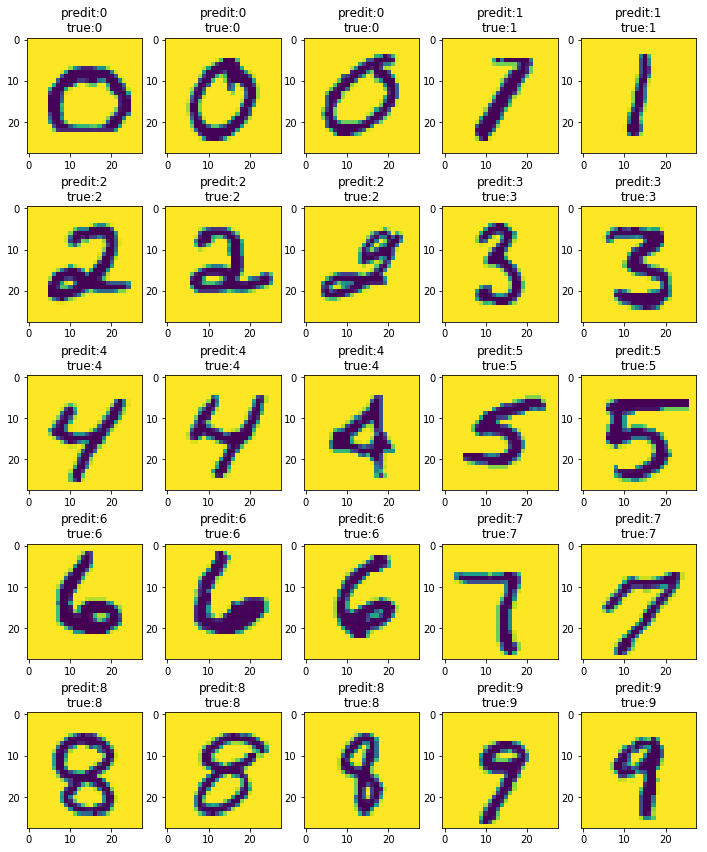

In [36]:
# 绘制图形
plt.figure(figsize=(12,15))

# 绘制25个图
im_datas = x_test[::20]
im_target = y_test[::20]
im_predict = y_[::20]

for i in range(25):
    # 子视图
    plt.subplot(5,5,(i+1))
    plt.imshow(im_datas[i].reshape(28,28))
    plt.title('predit:%d'%(im_predict[i]) + '\ntrue:%d'%(im_target[i]))